In [2]:
import SimpleITK as sitk
# import numpy as np
import matplotlib.pyplot as plt

In [3]:
print("Lecture 04")
img_file_name = "GFP_06-DAPI.tif"
print("... reading image from file: " + img_file_name)

Lecture 04
... reading image from file: GFP_06-DAPI.tif


In [4]:
'''Convert image to array'''
itkImage = sitk.ReadImage(img_file_name)
itkImage = sitk.Cast(itkImage, sitk.sitkFloat32)

In [5]:
# Apply the Canny Edge Detector
# Paramter 1: the input image
# Parameter 2: the lower threshold (default set to 0.0)
# Parameter 3: the upper threshold (default set to 0.0)
# Parameter 4: the smoothing parameter as a vector (default set to (3, 0.0)    
#img_ce = sitk.CannyEdgeDetection(itkImage, 0.0, 2.0, (5, .75)) 
img_ce = sitk.CannyEdgeDetection(itkImage, 5.0, 5.0)

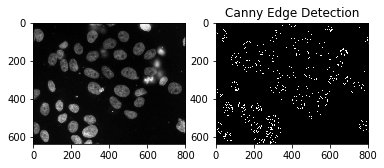

In [6]:
plt.subplot(1, 2, 1)
plt.imshow(sitk.GetArrayFromImage(itkImage), cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(sitk.GetArrayFromImage(img_ce), cmap='gray')
plt.title('Canny Edge Detection')
plt.show()

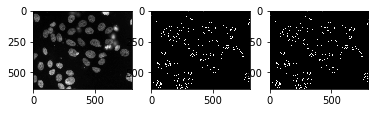

In [9]:
# Binary Threshold: http://www.itk.org/SimpleITKDoxygen/html/classitk_1_1simple_1_1BinaryThresholdImageFilter.html
# Paramter 1: the input image
# Parameter 2: the lower threshold (default set to 0.0)
# Parameter 3: the upper threshold (default set to 255.0)
# Parameter 5: inside value    
# Parameter 6: outside value
# Note: Input Image Type is float and output is unsigned char (8 bits)
img_Binary = sitk.BinaryThreshold(img_ce, 1, 1, 255, 0)

plt.subplot(1, 3, 1)
plt.imshow(sitk.GetArrayFromImage(itkImage), cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(sitk.GetArrayFromImage(img_ce), cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(sitk.GetArrayFromImage(img_Binary), cmap='gray')
plt.show()
